# Project 4 – Predicting a Continuous Target with Regression (Titanic)
**Name:** Albert Kabore  
**Date:** November 2025  
**Objective:**  

This project applies regression techniques to predict *fare* — the amount paid for the voyage — using passenger characteristics from the Titanic dataset. Building upon previous classification work, we shift to continuous target prediction using models such as Linear Regression, Ridge, Elastic Net, and Polynomial Regression.


## Import

In [194]:

# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Section 1. Import and Inspect Data

In [195]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

In [196]:
# Impute missing values for age using median
titanic['age'].fillna(titanic['age'].median(), inplace=True)


C:\Users\alber\AppData\Local\Temp\ipykernel_25768\3784983082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [197]:
# Drop rows with missing fare (or impute if preferred)
titanic = titanic.dropna(subset=['fare'])


In [198]:
# Create numeric variables (e.g., family_size from sibsp + parch + 1)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

## Section 3. Feature Selection and Justification

Cases:

In [199]:
# Case 1. age only
X1 = titanic[['age']]
y1 = titanic['fare']

In [200]:
# Case 2. family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']
 

In [201]:
# Case 3. age and family size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [202]:
# Case 4. Your choice - see below - fill in your variable(s) below.
# Case 4. pclass only
X4 = titanic[['pclass']]
y4 = titanic['fare']

### Reflection 

Why might these features affect a passenger's fare:
Age might correlate with wealth, family size might affect group pricing, and passenger class directly determines fare category.

List all available features:
survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone

Which other features could improve predictions and why:
Sex (historical pricing differences), embarked (different starting points), deck (location on ship)

How many variables are in your Case 4: 1 variable

Which variable(s) did you choose for Case 4 and why:
I chose pclass because it most directly determines fare category and should have strong predictive power.

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split Data

In [203]:
# 4.1 Split the Data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train Linear Models

In [204]:
# 4.2 Train and Evaluate Linear Regression Models (all 4 cases)
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)



In [205]:
# Predictions
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

### 4.3 Evaluate

In [206]:
# 4.3 Report Performance - FIXED VERSION
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred_test)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))
print()

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364



In [207]:
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred_test)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))
print()

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641



In [208]:
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y3_pred_test)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))
print()

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688



In [209]:
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred_test)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


## Section 5. Compare Alternative Models

### 5.1 Ridge Regression

In [210]:
# 5.1 Ridge Regression (L2 penalty)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net

In [211]:
# 5.2 Elastic Net (L1 + L2 combined)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

In [212]:
# 5.3 Polynomial Regression
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

In [213]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y_pred_poly = poly_model.predict(X4_test_poly)

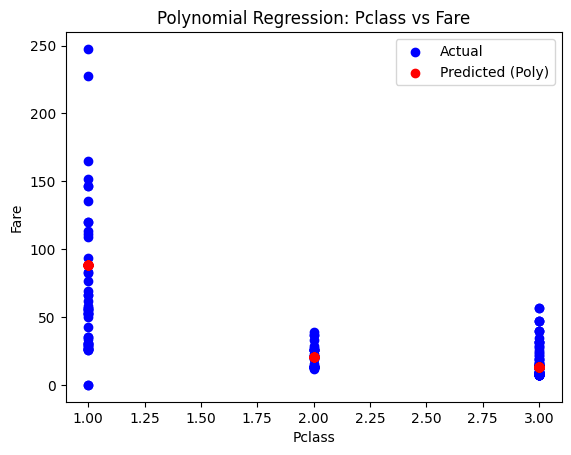

In [214]:
# 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Pclass vs Fare")
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()
